In [1]:
from pathlib import Path
import pandas as pd
from data.df_io import read, get_feat_lables
from data.df_prep import get_specific_split, pre_processing
from ai_models.PLA import PLA
from metrics.metrics import compute_acc
from visualization.models_plots import show_model_line


train_path = Path("../digits/db/dataset_digits/train.csv")
test_path = Path("../digits/db/dataset_digits/test.csv")

In [2]:
df_train = read(train_path)
df_test = read(test_path)

In [3]:
X_train, Y_train = get_feat_lables(df_train)
X_test, Y_test = get_feat_lables(df_test)

In [4]:
X_train_redu = pre_processing(X_train)
X_test_redu = pre_processing(X_test)

## Get specific 1x5 dataset

In [5]:
X_train_1x5, Y_train_1x5 = get_specific_split(X_train_redu, Y_train, 5, 1)
X_test_1x5, Y_test_1x5 = get_specific_split(X_test_redu, Y_test, 5, 1)

## Train and test PLA

In [6]:
pla_model = PLA()
it, w, W = pla_model.train(X_train_1x5, Y_train_1x5, epochs=1000)

In [7]:
Y_pred = pla_model.prediction(X_train_1x5, w)
compute_acc(Y_train_1x5, Y_pred)

1.0

In [8]:
it

845

In [9]:
Y_pred = pla_model.prediction(X_test_1x5, w)
compute_acc(Y_test_1x5, Y_pred)

1.0

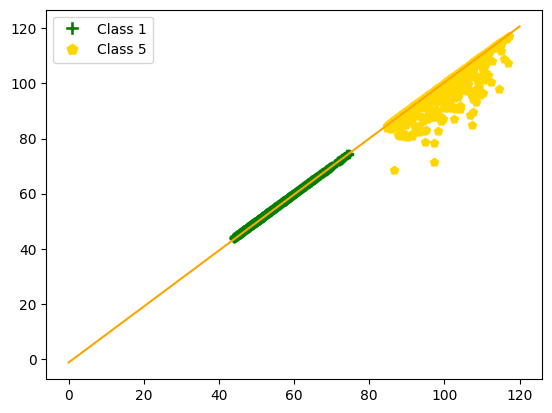

In [10]:
# show_model_line(
#     pd.DataFrame(X_train_1x5, columns=["intensity", "symmetry"]),
#     pd.DataFrame(Y_train_1x5, columns=["label"]), 
#     d1=1, 
#     d2=5,
#     w=w,
# )